IMPORT ALL LIBRARIES

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

DATA PREPROCESSING (EXPLORATION AND TRANSFORMATION)

In [3]:
#import dataset
climate = pd.read_csv("C:/Users/FOLU/Downloads/climate_change_impact_on_agriculture_2024.csv")

In [4]:
#print the first five data sets
climate.head()

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72


In [5]:
#show the shape of data
climate.shape

(10000, 15)

In [6]:
#show the variable names
climate.columns

Index(['Year', 'Country', 'Region', 'Crop_Type', 'Average_Temperature_C',
       'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA',
       'Extreme_Weather_Events', 'Irrigation_Access_%',
       'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA',
       'Soil_Health_Index', 'Adaptation_Strategies',
       'Economic_Impact_Million_USD'],
      dtype='object')

In [7]:
#show info of data
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         10000 non-null  int64  
 1   Country                      10000 non-null  object 
 2   Region                       10000 non-null  object 
 3   Crop_Type                    10000 non-null  object 
 4   Average_Temperature_C        10000 non-null  float64
 5   Total_Precipitation_mm       10000 non-null  float64
 6   CO2_Emissions_MT             10000 non-null  float64
 7   Crop_Yield_MT_per_HA         10000 non-null  float64
 8   Extreme_Weather_Events       10000 non-null  int64  
 9   Irrigation_Access_%          10000 non-null  float64
 10  Pesticide_Use_KG_per_HA      10000 non-null  float64
 11  Fertilizer_Use_KG_per_HA     10000 non-null  float64
 12  Soil_Health_Index            10000 non-null  float64
 13  Adaptation_Strate

In [8]:
#drop the "year" column
climate.drop(columns=["Year"],inplace=True)

In [9]:
#drop the "region" column
climate.drop(columns=["Region"],inplace=True)

In [10]:
#get the unique values of adaptation strategies
unique_adaptaion = climate["Adaptation_Strategies"].unique()
unique_adaptaion

array(['Water Management', 'Crop Rotation', 'No Adaptation',
       'Organic Farming', 'Drought-resistant Crops'], dtype=object)

In [11]:
#show the unique values of country
unique_country = climate["Country"].unique()
unique_country

array(['India', 'China', 'France', 'Canada', 'USA', 'Argentina',
       'Australia', 'Nigeria', 'Russia', 'Brazil'], dtype=object)

In [12]:
#show the unique values of crop type
unique_crop = climate["Crop_Type"].unique()
unique_crop


array(['Corn', 'Wheat', 'Coffee', 'Sugarcane', 'Fruits', 'Rice', 'Barley',
       'Vegetables', 'Soybeans', 'Cotton'], dtype=object)

In [13]:
#convert categorical variable country into numeric
convert_country = {'India':1, 'China':2, 'France':3, 'Canada':4, 'USA':5, 'Argentina':6,'Australia':7, 'Nigeria':8, 'Russia':9, 'Brazil':10 }
convert_country
climate["Country"] = climate["Country"].map(convert_country)

In [14]:
#convert categorical variable crop type into numeric
convert_crop = {"Corn":1, "Wheat":2, "Coffee":3, "Sugarcane":4, "Fruits":5, "Rice":6, "Barley":7,"Vegetables":8, "Soybeans":9, "Cotton":10 }
climate["Crop_Type"]= climate["Crop_Type"].map(convert_crop)
climate["Crop_Type"]

0        1
1        1
2        2
3        3
4        4
        ..
9995    10
9996     9
9997     3
9998     9
9999     1
Name: Crop_Type, Length: 10000, dtype: int64

In [15]:
#convert categorical variable adaptation strategies into numeric
convert_adaptation = {"Water Management":1, "Crop Rotation":2, "No Adaptation":3, "Organic Farming":4, "Drought-resistant Crops":5}
climate["Adaptation_Strategies"]= climate["Adaptation_Strategies"].map(convert_adaptation)
climate["Adaptation_Strategies"]

0       1
1       2
2       1
3       3
4       2
       ..
9995    3
9996    3
9997    1
9998    2
9999    1
Name: Adaptation_Strategies, Length: 10000, dtype: int64

In [16]:
climate.head()

,Country,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,1,1,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,1,808.13
1,2,1,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,2,616.22
2,3,2,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,1,796.96
3,4,3,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,3,790.32
4,1,4,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,2,401.72


In [17]:
#correlate variables
categorical_correlate = climate.corr()
categorical_correlate

,Country,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
Country,1.000000,-0.021889,-0.005643,-0.033991,-0.005092,-0.004147,0.022065,-0.004859,-0.014529,0.009575,0.007503,-0.007664,-0.000058
Crop_Type,-0.021889,1.000000,-0.012093,-0.002154,0.012381,-0.015263,0.003571,-0.013046,-0.008722,-0.006114,0.001677,0.020426,-0.019984
Average_Temperature_C,-0.005643,-0.012093,1.000000,0.007213,-0.003052,0.263781,-0.016808,-0.013268,0.005764,-0.014725,-0.010841,-0.001237,0.195827
Total_Precipitation_mm,-0.033991,-0.002154,0.007213,1.000000,-0.008681,0.029728,0.004360,-0.007580,0.011198,-0.026356,-0.021621,-0.006099,0.020966
CO2_Emissions_MT,-0.005092,0.012381,-0.003052,-0.008681,1.000000,-0.089868,0.001255,0.002995,0.015243,-0.020275,0.004518,-0.015517,-0.057035
Crop_Yield_MT_per_HA,-0.004147,-0.015263,0.263781,0.029728,-0.089868,1.000000,-0.005094,-0.000255,-0.004035,0.006423,-0.005692,0.005490,0.726358
Extreme_Weather_Events,0.022065,0.003571,-0.016808,0.004360,0.001255,-0.005094,1.000000,-0.012051,0.010497,0.014754,0.016266,0.007826,-0.004526
Irrigation_Access_%,-0.004859,-0.013046,-0.013268,-0.007580,0.002995,-0.000255,-0.012051,1.000000,-0.004588,0.008314,0.001652,0.000116,0.003988
Pesticide_Use_KG_per_HA,-0.014529,-0.008722,0.005764,0.011198,0.015243,-0.004035,0.010497,-0.004588,1.000000,-0.015429,0.012447,0.014095,-0.007796
Fertilizer_Use_KG_per_HA,0.009575,-0.006114,-0.014725,-0.026356,-0.020275,0.006423,0.014754,0.008314,-0.015429,1.000000,-0.000125,0.002903,0.010743


DATA VISUALIZATION

In [18]:
#reverse codes to names of categorical variables
climate['Crop_Type'] = climate['Crop_Type'].replace({1:'Corn', 2:'Wheat', 3:'Coffee', 4:'Sugarcane', 5:'Fruits', 6:'Rice', 7:'Barley',8:'Vegetables', 9:'Soybeans', 10:'Cotton'})

<Axes: xlabel='Crop_Type', ylabel='count'>

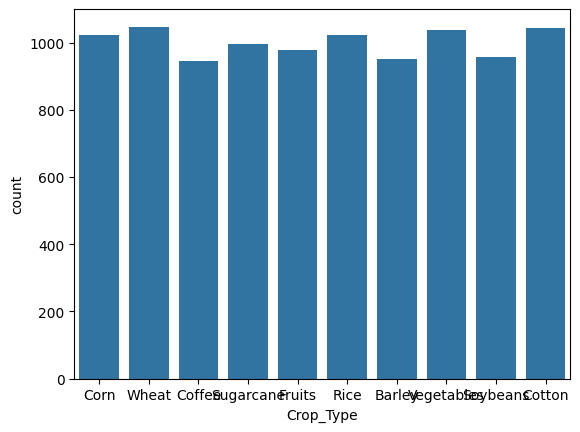

In [19]:
#show countplot for categorical variables
sns.countplot(x=climate["Crop_Type"],data=climate)


In [20]:
climate['Country'] = climate['Country'].replace({1:'India', 2:'China', 3:'France', 4:'Canada', 5:'USA', 6:'Argentina',7:'Australia', 8:'Nigeria', 9:'Russia', 10:'Brazil'})

<Axes: xlabel='Country', ylabel='count'>

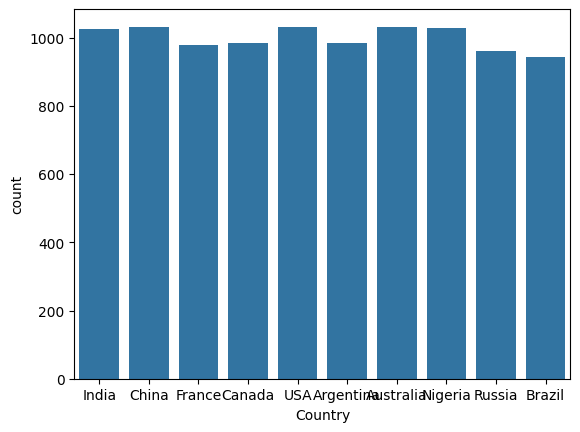

In [21]:
#show countplot for categorical variables "country"
sns.countplot(x=climate["Country"],data=climate)


In [22]:
climate['Adaptation_Strategies'] = climate['Adaptation_Strategies'].replace({1:'Water Management', 2:'Crop Rotation', 3:'No Adaptation',4:'Organic Farming', 5:'Drought-resistant Crops'})

<Axes: xlabel='Adaptation_Strategies', ylabel='count'>

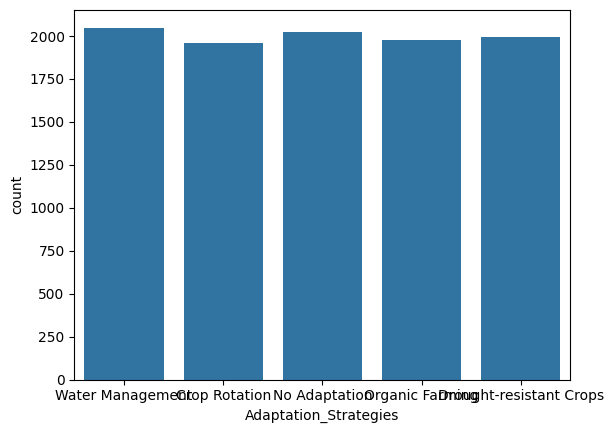

In [23]:
#show countplot for categorical variables "adaptation stategies"
sns.countplot(x=climate["Adaptation_Strategies"],data=climate)


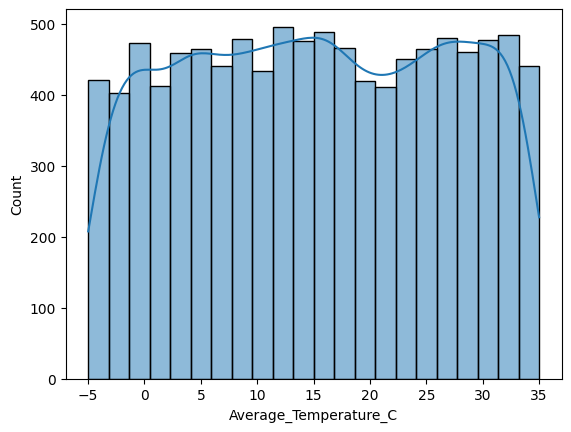

In [25]:
#show histoplot for numerical variables "country"
sns.histplot(climate["Average_Temperature_C"], kde=True);

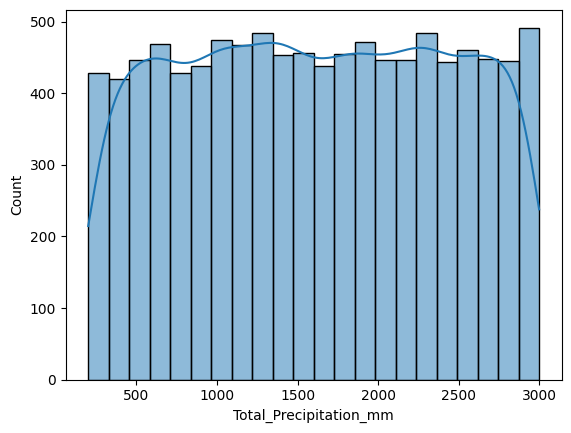

In [26]:
#show histoplot for numerical variables "country"
sns.histplot(climate["Total_Precipitation_mm"], kde=True);

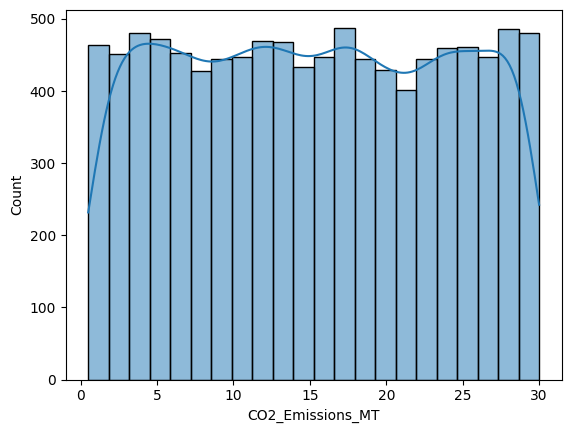

In [28]:
#show histoplot for numerical variables "co2 emission"
sns.histplot(climate["CO2_Emissions_MT"], kde=True);

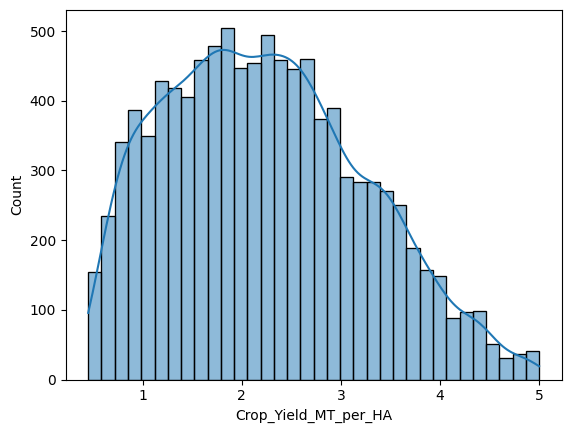

In [29]:
#show histoplot for numerical variables "Crop_Yield_MT_per_HA"
sns.histplot(climate["Crop_Yield_MT_per_HA"], kde=True);

In [30]:
climate.head()

,Country,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,India,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,China,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,Canada,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,India,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72


In [31]:
#convert categorical variable country into numeric
convert_country = {'India':1, 'China':2, 'France':3, 'Canada':4, 'USA':5, 'Argentina':6,'Australia':7, 'Nigeria':8, 'Russia':9, 'Brazil':10 }
convert_country
climate["Country"] = climate["Country"].map(convert_country)

In [32]:
#convert categorical variable adaptation strategies into numeric
convert_adaptation = {"Water Management":1, "Crop Rotation":2, "No Adaptation":3, "Organic Farming":4, "Drought-resistant Crops":5}
climate["Adaptation_Strategies"]= climate["Adaptation_Strategies"].map(convert_adaptation)
climate["Adaptation_Strategies"]

0       1
1       2
2       1
3       3
4       2
       ..
9995    3
9996    3
9997    1
9998    2
9999    1
Name: Adaptation_Strategies, Length: 10000, dtype: int64

In [33]:
#convert categorical variable crop type into numeric
convert_crop = {"Corn":1, "Wheat":2, "Coffee":3, "Sugarcane":4, "Fruits":5, "Rice":6, "Barley":7,"Vegetables":8, "Soybeans":9, "Cotton":10 }
climate["Crop_Type"]= climate["Crop_Type"].map(convert_crop)
climate["Crop_Type"]

0        1
1        1
2        2
3        3
4        4
        ..
9995    10
9996     9
9997     3
9998     9
9999     1
Name: Crop_Type, Length: 10000, dtype: int64

In [52]:
climate.describe()

,Country,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.456600,5.497200,15.241299,1611.663834,15.246608,2.240017,4.980900,55.248332,24.955735,49.973708,64.901278,2.991000,674.269658
std,2.860898,2.892547,11.466955,805.016815,8.589423,0.998342,3.165808,25.988305,14.490962,28.711027,20.195882,1.418069,414.591431
min,1.000000,1.000000,-4.990000,200.150000,0.500000,0.450000,0.000000,10.010000,0.000000,0.010000,30.000000,1.000000,47.840000
25%,3.000000,3.000000,5.430000,925.697500,7.760000,1.449000,2.000000,32.677500,12.527500,25.390000,47.235000,2.000000,350.545000
50%,5.000000,6.000000,15.175000,1611.160000,15.200000,2.170000,5.000000,55.175000,24.930000,49.635000,64.650000,3.000000,583.920000
75%,8.000000,8.000000,25.340000,2306.997500,22.820000,2.930000,8.000000,77.582500,37.470000,74.825000,82.472500,4.000000,917.505000
max,10.000000,10.000000,35.000000,2999.670000,30.000000,5.000000,10.000000,99.990000,49.990000,99.990000,100.000000,5.000000,2346.470000


MODELLING USING RANDOM FOREST REGRESSOR(RFR)

In [34]:
#import random forest regressor
from sklearn.ensemble import RandomForestRegressor

In [35]:
#import train-test-split
from sklearn.model_selection import train_test_split

In [36]:
#define X and y variables
y=climate["Crop_Yield_MT_per_HA"]
X = climate[['Country', 'Crop_Type', 'Average_Temperature_C','Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA','Extreme_Weather_Events', 'Irrigation_Access_%','Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA','Soil_Health_Index', 'Adaptation_Strategies','Economic_Impact_Million_USD']]

In [37]:
#define Xtrain and Xtest, ytrain and ytest
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=30)

In [38]:
#print Xtrain
X_train

,Country,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
2182,7,1,-1.18,2353.82,28.88,1.890,7,76.69,5.57,86.19,98.64,2,422.35
5766,8,1,21.84,1701.93,22.18,1.386,1,68.47,20.15,32.26,63.13,2,563.53
2439,1,1,28.62,1932.10,12.48,2.780,8,38.87,45.46,8.55,62.22,1,823.74
993,6,6,33.67,732.98,10.65,1.590,2,55.30,6.34,84.19,92.04,3,367.42
7426,1,10,-0.40,2788.93,16.98,0.666,9,55.32,49.46,8.36,98.18,2,266.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,2,6,10.76,1866.03,15.11,4.257,9,80.63,48.14,71.58,59.48,5,1801.88
919,9,9,-0.81,2780.43,21.56,1.305,9,31.07,48.48,2.68,43.90,1,436.83
500,8,8,21.18,820.76,27.70,1.206,9,30.43,30.41,26.21,89.35,1,200.20
4517,1,7,6.16,882.55,4.87,2.460,5,89.82,7.98,16.82,49.53,1,316.51


In [39]:
#print ytrain
y_train

2182    1.890
5766    1.386
2439    2.780
993     1.590
7426    0.666
        ...  
4859    4.257
919     1.305
500     1.206
4517    2.460
5925    1.740
Name: Crop_Yield_MT_per_HA, Length: 8000, dtype: float64

In [40]:
#initialise the RFR
model_rfr = RandomForestRegressor()

In [41]:
#define the rfr model
rfr_model = model_rfr.fit(X_train,y_train)

In [42]:
#import metrics for validation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [43]:
#define the predicted target variable
ypredict = rfr_model.predict (X_test)

In [44]:
#print ypredict
ypredict

array([1.98   , 2.69   , 0.96297, ..., 1.746  , 2.49003, 0.90998])

In [45]:
#initialise r2 score
r2 = r2_score(ypredict,y_test)

In [46]:
#print r2 score
r2

0.9999995394059319

In [47]:
#initialise mae
mae = mean_absolute_error(ypredict, y_test)

In [48]:
#print mae
mae

np.float64(0.00017747500000112263)

In [49]:
#initialise mse
mse=mean_squared_error(ypredict,y_test)

In [50]:
#print mse
mse

np.float64(4.5117065000000626e-07)